In [1]:
#Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

import matplotlib
%matplotlib inline

In [2]:
env = Environment(params={'scale':1.5, 'aspect':1})

(<Figure size 450x450 with 1 Axes>, <AxesSubplot: >)

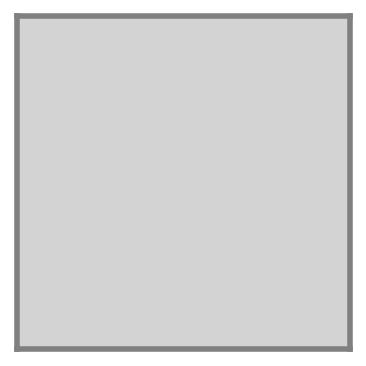

In [3]:
env.plot_environment()

In [4]:
agent = Agent(env, params={
    "dt": 0.01,
    "speed_coherence_time": 0.7,
    "speed_mean": 0.2,
    "rotational_velocity_coherence_time": 0.08,
    "rotational_velocity_std": 120 * (np.pi / 180),
    "thigmotaxis": 0.5,
})

In [5]:
place_cells = PlaceCells(agent, params={
    "n": 20,
    "name": "PlaceCells",
    "description": "gaussian",
    "widths": 0.20,
    "place_cell_centres": None,  # if given this will overwrite 'n',
    "wall_geometry": "line_of_sight",
    "min_fr": 0,
    "max_fr": 1,
    "name": "PlaceCells",
})

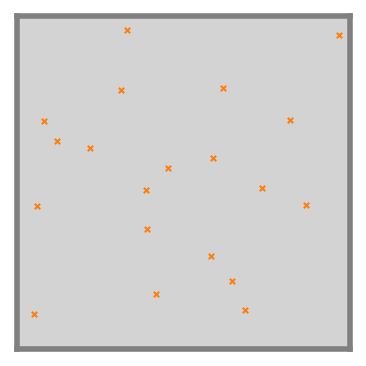

In [6]:
fig, ax = place_cells.plot_place_cell_locations()

In [7]:
from tqdm import tqdm #gives time bar

dt = 50e-3 # seconds
t_max = 10*60 # seconds

for i in tqdm(range(int(t_max/dt))):
    agent.update(dt=dt)
    place_cells.update()

100%|███████████████████████████████████| 12000/12000 [00:07<00:00, 1563.26it/s]


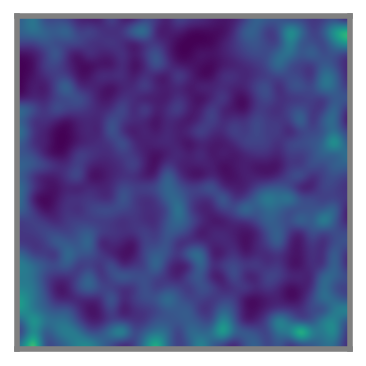

In [8]:
# plot history
fig, ax = agent.plot_position_heatmap()

In [9]:
anim = agent.animate_trajectory(speed_up=10)

In [10]:
from IPython import display
video = anim.to_html5_video()

In [11]:
html = display.HTML(video)
display.display(html)

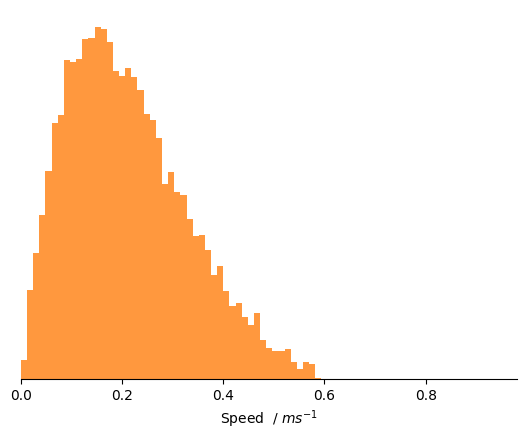

In [12]:
fig, ax = agent.plot_histogram_of_speeds()

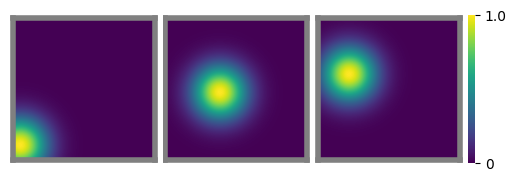

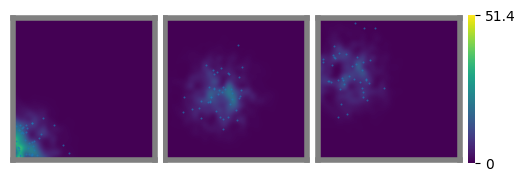

In [13]:
# 10 Plot rate maps. 
fig, ax = place_cells.plot_rate_map(chosen_neurons='3',method='groundtruth')
fig, ax = place_cells.plot_rate_map(chosen_neurons='3',method='history',spikes=True)

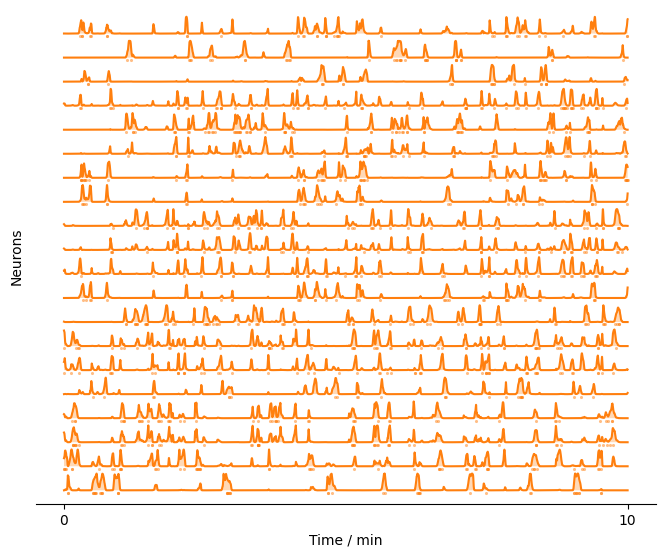

In [14]:
fig, ax = place_cells.plot_rate_timeseries()

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time / min', ylabel='Neurons'>)

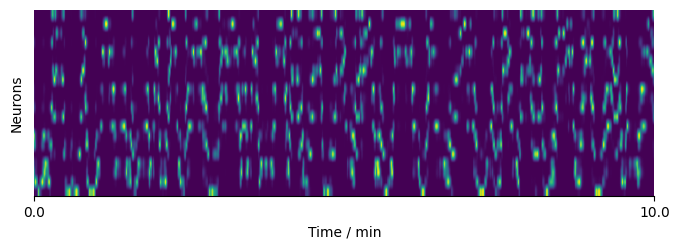

In [15]:
place_cells.plot_rate_timeseries(imshow=True)

In [16]:
print("Timestamps:", agent.history['t'][:10],"\n")
print("Positions:", agent.history['pos'][:10],"\n")
print("Firing rate timeseries:", place_cells.history['firingrate'][:10],"\n")
print("Spikes:", place_cells.history['spikes'][:10],"\n")

Timestamps: [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994] 

Positions: [[0.7974479898314359, 0.42324806620549504], [0.7928591738124613, 0.4196715738410848], [0.7905622009963779, 0.4178031635766828], [0.7882930972373575, 0.415907813566568], [0.7849420885908629, 0.41386399225630444], [0.7816120620482289, 0.4121808755576762], [0.7785583395237219, 0.41095591796984976], [0.7750523896106936, 0.4099196184045463], [0.7693446696441264, 0.4093075980390099], [0.763424243113559, 0.409182707353339]] 

Firing rate timeseries: [[0.0006268718990383329, 0.4790977766926868, 0.5769709186226286, 0.2401146433924791, 0.001098822709332162, 0.48823691351320536, 0.9235214950814731, 0.021707124547966482, 0.0003342504413000224, 0.18949072321315413, 0.08253302812122809, 0.09980236180096153, 3.628971137768333e-05, 0.0002520750303342397, 0.0006972761822959647, 0.0009476662355430639, 0.12459084342731493, 8.498066471174965e-07, 2.0611185364281346